# 基础版本的AutoEncoder

我们将使用MNIST数据来实现一个最简单的自编码器，从而复现原图。

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
print('TensorFlow version: %s' % tf.__version__)

TensorFlow version: 1.0.0


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# 加载数据

如果本地没有MNIST_data这个文件夹的话，TensorFlow会自动下载出来，我已经把压缩文件放在了MNIST_data路径下，所以可以直接加载。

In [26]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0, one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


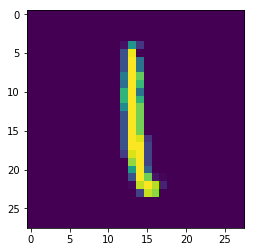

In [9]:
img = mnist.train.images[20]
plt.imshow(img.reshape((28,28)))

# 构造AutoEncoder

我们实现一个最简单的模型，即包括三个部分：

- 输入层
- 隐层
- 输出层

In [78]:
mnist.train.images.shape

(60000, 784)

In [67]:
# 设置参数
# 这里我们可以设置一下隐层结点数量，一般AutoEncoder用来降维压缩，所以这里要设置的比较小

hidden_units = 64
input_units = mnist.train.images.shape[1]

## 输入层

由于AutoEncoder是对源输入的复现，因此这里的输出层数据与输入层数据相同

In [68]:
inputs_ = tf.placeholder(tf.float32, (None, input_units), name='inputs_')
targets_ = tf.placeholder(tf.float32, (None, input_units), name='targets_')

## 隐层

In [69]:
hidden_ = tf.layers.dense(inputs_, hidden_units, activation=tf.nn.relu)

## 输出层

In [70]:
logits_ = tf.layers.dense(hidden_, input_units, activation=None)
outputs_ = tf.sigmoid(logits_, name='outputs_')

## 损失函数

In [71]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits_)
cost = tf.reduce_mean(loss)

## 优化函数

In [72]:
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# 训练

In [103]:
sess = tf.Session()

In [104]:
epochs = 20
batch_size = 128
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for idx in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size) # 获取下一个batch
        batch_cost, _ = sess.run([cost, optimizer], 
                                 feed_dict={inputs_: batch[0],
                                            targets_: batch[0]})
        print("Epoch: {}/{}".format(e+1, epochs), 
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20 Training loss: 0.6961
Epoch: 1/20 Training loss: 0.6226
Epoch: 1/20 Training loss: 0.5005
Epoch: 1/20 Training loss: 0.4082
Epoch: 1/20 Training loss: 0.3230
Epoch: 1/20 Training loss: 0.3159
Epoch: 1/20 Training loss: 0.3152
Epoch: 1/20 Training loss: 0.3033
Epoch: 1/20 Training loss: 0.3141
Epoch: 1/20 Training loss: 0.2961
Epoch: 1/20 Training loss: 0.2769
Epoch: 1/20 Training loss: 0.2759
Epoch: 1/20 Training loss: 0.2745
Epoch: 1/20 Training loss: 0.2783
Epoch: 1/20 Training loss: 0.2596
Epoch: 1/20 Training loss: 0.2546
Epoch: 1/20 Training loss: 0.2534
Epoch: 1/20 Training loss: 0.2487
Epoch: 1/20 Training loss: 0.2498
Epoch: 1/20 Training loss: 0.2400
Epoch: 1/20 Training loss: 0.2387
Epoch: 1/20 Training loss: 0.2299
Epoch: 1/20 Training loss: 0.2245
Epoch: 1/20 Training loss: 0.2310
Epoch: 1/20 Training loss: 0.2235
Epoch: 1/20 Training loss: 0.2166
Epoch: 1/20 Training loss: 0.2198
Epoch: 1/20 Training loss: 0.2170
Epoch: 1/20 Training loss: 0.2126
Epoch: 1/20 Tr

Epoch: 1/20 Training loss: 0.1082
Epoch: 1/20 Training loss: 0.1078
Epoch: 1/20 Training loss: 0.1053
Epoch: 1/20 Training loss: 0.1044
Epoch: 1/20 Training loss: 0.1043
Epoch: 1/20 Training loss: 0.1065
Epoch: 1/20 Training loss: 0.1094
Epoch: 1/20 Training loss: 0.1124
Epoch: 1/20 Training loss: 0.1118
Epoch: 1/20 Training loss: 0.1084
Epoch: 1/20 Training loss: 0.1071
Epoch: 1/20 Training loss: 0.1121
Epoch: 1/20 Training loss: 0.1031
Epoch: 1/20 Training loss: 0.1056
Epoch: 1/20 Training loss: 0.1109
Epoch: 1/20 Training loss: 0.1034
Epoch: 1/20 Training loss: 0.1116
Epoch: 1/20 Training loss: 0.1074
Epoch: 1/20 Training loss: 0.1098
Epoch: 1/20 Training loss: 0.1045
Epoch: 1/20 Training loss: 0.1072
Epoch: 1/20 Training loss: 0.1068
Epoch: 1/20 Training loss: 0.1007
Epoch: 1/20 Training loss: 0.1030
Epoch: 1/20 Training loss: 0.1100
Epoch: 1/20 Training loss: 0.1071
Epoch: 1/20 Training loss: 0.1043
Epoch: 1/20 Training loss: 0.1106
Epoch: 1/20 Training loss: 0.1082
Epoch: 1/20 Tr

Epoch: 2/20 Training loss: 0.1024
Epoch: 2/20 Training loss: 0.1002
Epoch: 2/20 Training loss: 0.1020
Epoch: 2/20 Training loss: 0.0971
Epoch: 2/20 Training loss: 0.0983
Epoch: 2/20 Training loss: 0.1041
Epoch: 2/20 Training loss: 0.1016
Epoch: 2/20 Training loss: 0.0971
Epoch: 2/20 Training loss: 0.1016
Epoch: 2/20 Training loss: 0.0981
Epoch: 2/20 Training loss: 0.0958
Epoch: 2/20 Training loss: 0.1007
Epoch: 2/20 Training loss: 0.0994
Epoch: 2/20 Training loss: 0.0973
Epoch: 2/20 Training loss: 0.0966
Epoch: 2/20 Training loss: 0.1015
Epoch: 2/20 Training loss: 0.1001
Epoch: 2/20 Training loss: 0.1012
Epoch: 2/20 Training loss: 0.0998
Epoch: 2/20 Training loss: 0.1019
Epoch: 2/20 Training loss: 0.1012
Epoch: 2/20 Training loss: 0.0991
Epoch: 2/20 Training loss: 0.1001
Epoch: 2/20 Training loss: 0.1004
Epoch: 2/20 Training loss: 0.0997
Epoch: 2/20 Training loss: 0.0990
Epoch: 2/20 Training loss: 0.1048
Epoch: 2/20 Training loss: 0.0965
Epoch: 2/20 Training loss: 0.1003
Epoch: 2/20 Tr

Epoch: 2/20 Training loss: 0.0992
Epoch: 2/20 Training loss: 0.0940
Epoch: 2/20 Training loss: 0.0979
Epoch: 2/20 Training loss: 0.1034
Epoch: 2/20 Training loss: 0.1050
Epoch: 2/20 Training loss: 0.1003
Epoch: 2/20 Training loss: 0.0991
Epoch: 2/20 Training loss: 0.1009
Epoch: 2/20 Training loss: 0.0998
Epoch: 2/20 Training loss: 0.0974
Epoch: 2/20 Training loss: 0.0973
Epoch: 2/20 Training loss: 0.0990
Epoch: 2/20 Training loss: 0.0964
Epoch: 2/20 Training loss: 0.0999
Epoch: 2/20 Training loss: 0.0971
Epoch: 2/20 Training loss: 0.0977
Epoch: 2/20 Training loss: 0.0977
Epoch: 2/20 Training loss: 0.0995
Epoch: 2/20 Training loss: 0.0949
Epoch: 2/20 Training loss: 0.0982
Epoch: 2/20 Training loss: 0.0990
Epoch: 2/20 Training loss: 0.0992
Epoch: 2/20 Training loss: 0.1017
Epoch: 2/20 Training loss: 0.0984
Epoch: 2/20 Training loss: 0.0938
Epoch: 2/20 Training loss: 0.0988
Epoch: 2/20 Training loss: 0.0968
Epoch: 2/20 Training loss: 0.1026
Epoch: 2/20 Training loss: 0.1008
Epoch: 2/20 Tr

Epoch: 3/20 Training loss: 0.0972
Epoch: 3/20 Training loss: 0.0986
Epoch: 3/20 Training loss: 0.0931
Epoch: 3/20 Training loss: 0.1026
Epoch: 3/20 Training loss: 0.0949
Epoch: 3/20 Training loss: 0.0992
Epoch: 3/20 Training loss: 0.0949
Epoch: 3/20 Training loss: 0.0986
Epoch: 3/20 Training loss: 0.0932
Epoch: 3/20 Training loss: 0.0961
Epoch: 3/20 Training loss: 0.1001
Epoch: 3/20 Training loss: 0.0997
Epoch: 3/20 Training loss: 0.0981
Epoch: 3/20 Training loss: 0.0974
Epoch: 3/20 Training loss: 0.0974
Epoch: 3/20 Training loss: 0.0970
Epoch: 3/20 Training loss: 0.0919
Epoch: 3/20 Training loss: 0.1002
Epoch: 3/20 Training loss: 0.0947
Epoch: 3/20 Training loss: 0.0984
Epoch: 3/20 Training loss: 0.0956
Epoch: 3/20 Training loss: 0.0983
Epoch: 3/20 Training loss: 0.0971
Epoch: 3/20 Training loss: 0.0969
Epoch: 3/20 Training loss: 0.1000
Epoch: 3/20 Training loss: 0.0952
Epoch: 3/20 Training loss: 0.1010
Epoch: 3/20 Training loss: 0.0968
Epoch: 3/20 Training loss: 0.0966
Epoch: 3/20 Tr

Epoch: 3/20 Training loss: 0.0965
Epoch: 3/20 Training loss: 0.0942
Epoch: 3/20 Training loss: 0.0990
Epoch: 3/20 Training loss: 0.0952
Epoch: 3/20 Training loss: 0.0938
Epoch: 3/20 Training loss: 0.1013
Epoch: 3/20 Training loss: 0.1012
Epoch: 3/20 Training loss: 0.0945
Epoch: 3/20 Training loss: 0.1015
Epoch: 3/20 Training loss: 0.0924
Epoch: 3/20 Training loss: 0.0954
Epoch: 3/20 Training loss: 0.1028
Epoch: 3/20 Training loss: 0.1023
Epoch: 3/20 Training loss: 0.0972
Epoch: 3/20 Training loss: 0.0977
Epoch: 3/20 Training loss: 0.1011
Epoch: 3/20 Training loss: 0.0932
Epoch: 3/20 Training loss: 0.0983
Epoch: 3/20 Training loss: 0.0966
Epoch: 3/20 Training loss: 0.1032
Epoch: 3/20 Training loss: 0.0944
Epoch: 3/20 Training loss: 0.1004
Epoch: 3/20 Training loss: 0.0934
Epoch: 3/20 Training loss: 0.0945
Epoch: 3/20 Training loss: 0.0933
Epoch: 3/20 Training loss: 0.0974
Epoch: 3/20 Training loss: 0.0958
Epoch: 3/20 Training loss: 0.0987
Epoch: 3/20 Training loss: 0.0974
Epoch: 3/20 Tr

Epoch: 4/20 Training loss: 0.1003
Epoch: 4/20 Training loss: 0.0987
Epoch: 4/20 Training loss: 0.0970
Epoch: 4/20 Training loss: 0.0987
Epoch: 4/20 Training loss: 0.0980
Epoch: 4/20 Training loss: 0.1002
Epoch: 4/20 Training loss: 0.0979
Epoch: 4/20 Training loss: 0.0948
Epoch: 4/20 Training loss: 0.0939
Epoch: 4/20 Training loss: 0.0980
Epoch: 4/20 Training loss: 0.1004
Epoch: 4/20 Training loss: 0.0992
Epoch: 4/20 Training loss: 0.0964
Epoch: 4/20 Training loss: 0.0915
Epoch: 4/20 Training loss: 0.0960
Epoch: 4/20 Training loss: 0.1020
Epoch: 4/20 Training loss: 0.0941
Epoch: 4/20 Training loss: 0.0987
Epoch: 4/20 Training loss: 0.0979
Epoch: 4/20 Training loss: 0.0973
Epoch: 4/20 Training loss: 0.0975
Epoch: 4/20 Training loss: 0.0966
Epoch: 4/20 Training loss: 0.0969
Epoch: 4/20 Training loss: 0.0994
Epoch: 4/20 Training loss: 0.0975
Epoch: 4/20 Training loss: 0.0976
Epoch: 4/20 Training loss: 0.0945
Epoch: 4/20 Training loss: 0.0965
Epoch: 4/20 Training loss: 0.0946
Epoch: 4/20 Tr

Epoch: 4/20 Training loss: 0.0946
Epoch: 4/20 Training loss: 0.0928
Epoch: 4/20 Training loss: 0.0983
Epoch: 4/20 Training loss: 0.0977
Epoch: 4/20 Training loss: 0.0968
Epoch: 4/20 Training loss: 0.1014
Epoch: 4/20 Training loss: 0.0965
Epoch: 4/20 Training loss: 0.0981
Epoch: 4/20 Training loss: 0.0947
Epoch: 4/20 Training loss: 0.1003
Epoch: 4/20 Training loss: 0.1022
Epoch: 4/20 Training loss: 0.0975
Epoch: 4/20 Training loss: 0.0951
Epoch: 4/20 Training loss: 0.1001
Epoch: 4/20 Training loss: 0.0928
Epoch: 4/20 Training loss: 0.0948
Epoch: 4/20 Training loss: 0.1001
Epoch: 4/20 Training loss: 0.0973
Epoch: 4/20 Training loss: 0.1007
Epoch: 4/20 Training loss: 0.0979
Epoch: 4/20 Training loss: 0.0962
Epoch: 4/20 Training loss: 0.0941
Epoch: 4/20 Training loss: 0.0935
Epoch: 4/20 Training loss: 0.0985
Epoch: 4/20 Training loss: 0.0906
Epoch: 4/20 Training loss: 0.0998
Epoch: 4/20 Training loss: 0.0973
Epoch: 4/20 Training loss: 0.1021
Epoch: 4/20 Training loss: 0.1005
Epoch: 4/20 Tr

Epoch: 5/20 Training loss: 0.0941
Epoch: 5/20 Training loss: 0.0995
Epoch: 5/20 Training loss: 0.0973
Epoch: 5/20 Training loss: 0.0964
Epoch: 5/20 Training loss: 0.0963
Epoch: 5/20 Training loss: 0.0999
Epoch: 5/20 Training loss: 0.0962
Epoch: 5/20 Training loss: 0.0944
Epoch: 5/20 Training loss: 0.0982
Epoch: 5/20 Training loss: 0.0984
Epoch: 5/20 Training loss: 0.0997
Epoch: 5/20 Training loss: 0.1004
Epoch: 5/20 Training loss: 0.0984
Epoch: 5/20 Training loss: 0.0955
Epoch: 5/20 Training loss: 0.0964
Epoch: 5/20 Training loss: 0.0976
Epoch: 5/20 Training loss: 0.1001
Epoch: 5/20 Training loss: 0.1004
Epoch: 5/20 Training loss: 0.0994
Epoch: 5/20 Training loss: 0.0921
Epoch: 5/20 Training loss: 0.0927
Epoch: 5/20 Training loss: 0.0947
Epoch: 5/20 Training loss: 0.0957
Epoch: 5/20 Training loss: 0.0931
Epoch: 5/20 Training loss: 0.0965
Epoch: 5/20 Training loss: 0.0962
Epoch: 5/20 Training loss: 0.0983
Epoch: 5/20 Training loss: 0.0943
Epoch: 5/20 Training loss: 0.0970
Epoch: 5/20 Tr

Epoch: 5/20 Training loss: 0.0935
Epoch: 5/20 Training loss: 0.0993
Epoch: 5/20 Training loss: 0.0996
Epoch: 5/20 Training loss: 0.0981
Epoch: 5/20 Training loss: 0.0971
Epoch: 5/20 Training loss: 0.0979
Epoch: 5/20 Training loss: 0.1012
Epoch: 5/20 Training loss: 0.0996
Epoch: 5/20 Training loss: 0.0956
Epoch: 6/20 Training loss: 0.0967
Epoch: 6/20 Training loss: 0.0975
Epoch: 6/20 Training loss: 0.0949
Epoch: 6/20 Training loss: 0.0971
Epoch: 6/20 Training loss: 0.0965
Epoch: 6/20 Training loss: 0.0960
Epoch: 6/20 Training loss: 0.0951
Epoch: 6/20 Training loss: 0.0955
Epoch: 6/20 Training loss: 0.0959
Epoch: 6/20 Training loss: 0.1000
Epoch: 6/20 Training loss: 0.0928
Epoch: 6/20 Training loss: 0.0948
Epoch: 6/20 Training loss: 0.0939
Epoch: 6/20 Training loss: 0.0946
Epoch: 6/20 Training loss: 0.0927
Epoch: 6/20 Training loss: 0.0966
Epoch: 6/20 Training loss: 0.0963
Epoch: 6/20 Training loss: 0.0994
Epoch: 6/20 Training loss: 0.0944
Epoch: 6/20 Training loss: 0.0948
Epoch: 6/20 Tr

Epoch: 6/20 Training loss: 0.0990
Epoch: 6/20 Training loss: 0.0977
Epoch: 6/20 Training loss: 0.0987
Epoch: 6/20 Training loss: 0.1022
Epoch: 6/20 Training loss: 0.0979
Epoch: 6/20 Training loss: 0.0924
Epoch: 6/20 Training loss: 0.0965
Epoch: 6/20 Training loss: 0.0966
Epoch: 6/20 Training loss: 0.0933
Epoch: 6/20 Training loss: 0.0974
Epoch: 6/20 Training loss: 0.0950
Epoch: 6/20 Training loss: 0.0974
Epoch: 6/20 Training loss: 0.0971
Epoch: 6/20 Training loss: 0.0951
Epoch: 6/20 Training loss: 0.0962
Epoch: 6/20 Training loss: 0.0884
Epoch: 6/20 Training loss: 0.0948
Epoch: 6/20 Training loss: 0.0911
Epoch: 6/20 Training loss: 0.0952
Epoch: 6/20 Training loss: 0.0961
Epoch: 6/20 Training loss: 0.0943
Epoch: 6/20 Training loss: 0.0982
Epoch: 6/20 Training loss: 0.0956
Epoch: 6/20 Training loss: 0.0963
Epoch: 6/20 Training loss: 0.0959
Epoch: 6/20 Training loss: 0.0985
Epoch: 6/20 Training loss: 0.0958
Epoch: 6/20 Training loss: 0.0983
Epoch: 6/20 Training loss: 0.0944
Epoch: 6/20 Tr

Epoch: 7/20 Training loss: 0.0997
Epoch: 7/20 Training loss: 0.0969
Epoch: 7/20 Training loss: 0.0977
Epoch: 7/20 Training loss: 0.0948
Epoch: 7/20 Training loss: 0.0959
Epoch: 7/20 Training loss: 0.0976
Epoch: 7/20 Training loss: 0.0974
Epoch: 7/20 Training loss: 0.0944
Epoch: 7/20 Training loss: 0.0962
Epoch: 7/20 Training loss: 0.0913
Epoch: 7/20 Training loss: 0.0948
Epoch: 7/20 Training loss: 0.0992
Epoch: 7/20 Training loss: 0.0920
Epoch: 7/20 Training loss: 0.0922
Epoch: 7/20 Training loss: 0.0974
Epoch: 7/20 Training loss: 0.0981
Epoch: 7/20 Training loss: 0.0990
Epoch: 7/20 Training loss: 0.0963
Epoch: 7/20 Training loss: 0.0952
Epoch: 7/20 Training loss: 0.0949
Epoch: 7/20 Training loss: 0.0985
Epoch: 7/20 Training loss: 0.0968
Epoch: 7/20 Training loss: 0.0911
Epoch: 7/20 Training loss: 0.0967
Epoch: 7/20 Training loss: 0.0978
Epoch: 7/20 Training loss: 0.0950
Epoch: 7/20 Training loss: 0.0934
Epoch: 7/20 Training loss: 0.0965
Epoch: 7/20 Training loss: 0.0952
Epoch: 7/20 Tr

Epoch: 7/20 Training loss: 0.0969
Epoch: 7/20 Training loss: 0.0950
Epoch: 7/20 Training loss: 0.0958
Epoch: 7/20 Training loss: 0.0977
Epoch: 7/20 Training loss: 0.0945
Epoch: 7/20 Training loss: 0.1015
Epoch: 7/20 Training loss: 0.0941
Epoch: 7/20 Training loss: 0.0957
Epoch: 7/20 Training loss: 0.0952
Epoch: 7/20 Training loss: 0.0969
Epoch: 7/20 Training loss: 0.0961
Epoch: 7/20 Training loss: 0.1004
Epoch: 7/20 Training loss: 0.0974
Epoch: 7/20 Training loss: 0.0926
Epoch: 7/20 Training loss: 0.0963
Epoch: 7/20 Training loss: 0.0931
Epoch: 7/20 Training loss: 0.0965
Epoch: 7/20 Training loss: 0.0945
Epoch: 7/20 Training loss: 0.0909
Epoch: 7/20 Training loss: 0.0954
Epoch: 7/20 Training loss: 0.0950
Epoch: 7/20 Training loss: 0.1004
Epoch: 7/20 Training loss: 0.0977
Epoch: 7/20 Training loss: 0.0908
Epoch: 7/20 Training loss: 0.0915
Epoch: 7/20 Training loss: 0.0921
Epoch: 7/20 Training loss: 0.0980
Epoch: 7/20 Training loss: 0.0935
Epoch: 7/20 Training loss: 0.0997
Epoch: 7/20 Tr

Epoch: 8/20 Training loss: 0.0953
Epoch: 8/20 Training loss: 0.0935
Epoch: 8/20 Training loss: 0.0961
Epoch: 8/20 Training loss: 0.0993
Epoch: 8/20 Training loss: 0.0969
Epoch: 8/20 Training loss: 0.0990
Epoch: 8/20 Training loss: 0.0941
Epoch: 8/20 Training loss: 0.0996
Epoch: 8/20 Training loss: 0.1008
Epoch: 8/20 Training loss: 0.0981
Epoch: 8/20 Training loss: 0.0926
Epoch: 8/20 Training loss: 0.0925
Epoch: 8/20 Training loss: 0.0979
Epoch: 8/20 Training loss: 0.0969
Epoch: 8/20 Training loss: 0.0953
Epoch: 8/20 Training loss: 0.0936
Epoch: 8/20 Training loss: 0.0947
Epoch: 8/20 Training loss: 0.0948
Epoch: 8/20 Training loss: 0.0962
Epoch: 8/20 Training loss: 0.0947
Epoch: 8/20 Training loss: 0.0962
Epoch: 8/20 Training loss: 0.0923
Epoch: 8/20 Training loss: 0.1006
Epoch: 8/20 Training loss: 0.0952
Epoch: 8/20 Training loss: 0.0954
Epoch: 8/20 Training loss: 0.0923
Epoch: 8/20 Training loss: 0.0944
Epoch: 8/20 Training loss: 0.0957
Epoch: 8/20 Training loss: 0.0979
Epoch: 8/20 Tr

Epoch: 8/20 Training loss: 0.0957
Epoch: 8/20 Training loss: 0.0954
Epoch: 8/20 Training loss: 0.0952
Epoch: 8/20 Training loss: 0.0907
Epoch: 8/20 Training loss: 0.0920
Epoch: 8/20 Training loss: 0.0958
Epoch: 8/20 Training loss: 0.0969
Epoch: 8/20 Training loss: 0.0983
Epoch: 8/20 Training loss: 0.0949
Epoch: 8/20 Training loss: 0.0932
Epoch: 8/20 Training loss: 0.0998
Epoch: 8/20 Training loss: 0.0935
Epoch: 8/20 Training loss: 0.0965
Epoch: 8/20 Training loss: 0.0992
Epoch: 8/20 Training loss: 0.0950
Epoch: 8/20 Training loss: 0.0943
Epoch: 8/20 Training loss: 0.0945
Epoch: 8/20 Training loss: 0.1027
Epoch: 8/20 Training loss: 0.0995
Epoch: 8/20 Training loss: 0.0978
Epoch: 8/20 Training loss: 0.0941
Epoch: 8/20 Training loss: 0.0938
Epoch: 8/20 Training loss: 0.0986
Epoch: 8/20 Training loss: 0.0954
Epoch: 9/20 Training loss: 0.0967
Epoch: 9/20 Training loss: 0.0982
Epoch: 9/20 Training loss: 0.0951
Epoch: 9/20 Training loss: 0.0929
Epoch: 9/20 Training loss: 0.0975
Epoch: 9/20 Tr

Epoch: 9/20 Training loss: 0.0934
Epoch: 9/20 Training loss: 0.0964
Epoch: 9/20 Training loss: 0.0945
Epoch: 9/20 Training loss: 0.0989
Epoch: 9/20 Training loss: 0.0943
Epoch: 9/20 Training loss: 0.1011
Epoch: 9/20 Training loss: 0.0952
Epoch: 9/20 Training loss: 0.0909
Epoch: 9/20 Training loss: 0.0971
Epoch: 9/20 Training loss: 0.0947
Epoch: 9/20 Training loss: 0.0980
Epoch: 9/20 Training loss: 0.0944
Epoch: 9/20 Training loss: 0.0910
Epoch: 9/20 Training loss: 0.0912
Epoch: 9/20 Training loss: 0.1039
Epoch: 9/20 Training loss: 0.0975
Epoch: 9/20 Training loss: 0.0999
Epoch: 9/20 Training loss: 0.0945
Epoch: 9/20 Training loss: 0.0965
Epoch: 9/20 Training loss: 0.0940
Epoch: 9/20 Training loss: 0.0932
Epoch: 9/20 Training loss: 0.0946
Epoch: 9/20 Training loss: 0.0954
Epoch: 9/20 Training loss: 0.0900
Epoch: 9/20 Training loss: 0.1057
Epoch: 9/20 Training loss: 0.0951
Epoch: 9/20 Training loss: 0.0956
Epoch: 9/20 Training loss: 0.0962
Epoch: 9/20 Training loss: 0.0935
Epoch: 9/20 Tr

Epoch: 9/20 Training loss: 0.1004
Epoch: 10/20 Training loss: 0.0924
Epoch: 10/20 Training loss: 0.0941
Epoch: 10/20 Training loss: 0.0955
Epoch: 10/20 Training loss: 0.0955
Epoch: 10/20 Training loss: 0.0944
Epoch: 10/20 Training loss: 0.0964
Epoch: 10/20 Training loss: 0.0920
Epoch: 10/20 Training loss: 0.0946
Epoch: 10/20 Training loss: 0.0960
Epoch: 10/20 Training loss: 0.0926
Epoch: 10/20 Training loss: 0.0952
Epoch: 10/20 Training loss: 0.0949
Epoch: 10/20 Training loss: 0.0938
Epoch: 10/20 Training loss: 0.0888
Epoch: 10/20 Training loss: 0.0974
Epoch: 10/20 Training loss: 0.0974
Epoch: 10/20 Training loss: 0.0982
Epoch: 10/20 Training loss: 0.0918
Epoch: 10/20 Training loss: 0.0923
Epoch: 10/20 Training loss: 0.0920
Epoch: 10/20 Training loss: 0.0933
Epoch: 10/20 Training loss: 0.0926
Epoch: 10/20 Training loss: 0.0943
Epoch: 10/20 Training loss: 0.0935
Epoch: 10/20 Training loss: 0.0969
Epoch: 10/20 Training loss: 0.0907
Epoch: 10/20 Training loss: 0.0996
Epoch: 10/20 Training

Epoch: 10/20 Training loss: 0.0986
Epoch: 10/20 Training loss: 0.0930
Epoch: 10/20 Training loss: 0.0978
Epoch: 10/20 Training loss: 0.0953
Epoch: 10/20 Training loss: 0.0931
Epoch: 10/20 Training loss: 0.0967
Epoch: 10/20 Training loss: 0.0936
Epoch: 10/20 Training loss: 0.0965
Epoch: 10/20 Training loss: 0.0974
Epoch: 10/20 Training loss: 0.0926
Epoch: 10/20 Training loss: 0.0924
Epoch: 10/20 Training loss: 0.0948
Epoch: 10/20 Training loss: 0.0944
Epoch: 10/20 Training loss: 0.0937
Epoch: 10/20 Training loss: 0.0902
Epoch: 10/20 Training loss: 0.0963
Epoch: 10/20 Training loss: 0.0945
Epoch: 10/20 Training loss: 0.0973
Epoch: 10/20 Training loss: 0.0990
Epoch: 10/20 Training loss: 0.0961
Epoch: 10/20 Training loss: 0.0958
Epoch: 10/20 Training loss: 0.0966
Epoch: 10/20 Training loss: 0.0954
Epoch: 10/20 Training loss: 0.0955
Epoch: 10/20 Training loss: 0.0982
Epoch: 10/20 Training loss: 0.1004
Epoch: 10/20 Training loss: 0.0996
Epoch: 10/20 Training loss: 0.0942
Epoch: 10/20 Trainin

Epoch: 11/20 Training loss: 0.0995
Epoch: 11/20 Training loss: 0.0975
Epoch: 11/20 Training loss: 0.0956
Epoch: 11/20 Training loss: 0.0983
Epoch: 11/20 Training loss: 0.0968
Epoch: 11/20 Training loss: 0.0877
Epoch: 11/20 Training loss: 0.0963
Epoch: 11/20 Training loss: 0.0952
Epoch: 11/20 Training loss: 0.0896
Epoch: 11/20 Training loss: 0.0919
Epoch: 11/20 Training loss: 0.0961
Epoch: 11/20 Training loss: 0.0945
Epoch: 11/20 Training loss: 0.0990
Epoch: 11/20 Training loss: 0.0947
Epoch: 11/20 Training loss: 0.0979
Epoch: 11/20 Training loss: 0.0940
Epoch: 11/20 Training loss: 0.0938
Epoch: 11/20 Training loss: 0.0946
Epoch: 11/20 Training loss: 0.0978
Epoch: 11/20 Training loss: 0.0956
Epoch: 11/20 Training loss: 0.0955
Epoch: 11/20 Training loss: 0.0940
Epoch: 11/20 Training loss: 0.1001
Epoch: 11/20 Training loss: 0.0953
Epoch: 11/20 Training loss: 0.0927
Epoch: 11/20 Training loss: 0.0965
Epoch: 11/20 Training loss: 0.0919
Epoch: 11/20 Training loss: 0.1000
Epoch: 11/20 Trainin

Epoch: 11/20 Training loss: 0.0955
Epoch: 11/20 Training loss: 0.0994
Epoch: 11/20 Training loss: 0.0953
Epoch: 11/20 Training loss: 0.0913
Epoch: 11/20 Training loss: 0.0959
Epoch: 11/20 Training loss: 0.0977
Epoch: 11/20 Training loss: 0.0919
Epoch: 11/20 Training loss: 0.0916
Epoch: 11/20 Training loss: 0.1013
Epoch: 11/20 Training loss: 0.0937
Epoch: 11/20 Training loss: 0.0916
Epoch: 11/20 Training loss: 0.0952
Epoch: 11/20 Training loss: 0.0963
Epoch: 11/20 Training loss: 0.0922
Epoch: 11/20 Training loss: 0.0963
Epoch: 11/20 Training loss: 0.0922
Epoch: 11/20 Training loss: 0.0904
Epoch: 11/20 Training loss: 0.1009
Epoch: 11/20 Training loss: 0.0952
Epoch: 11/20 Training loss: 0.0984
Epoch: 11/20 Training loss: 0.0968
Epoch: 11/20 Training loss: 0.0993
Epoch: 11/20 Training loss: 0.0937
Epoch: 11/20 Training loss: 0.0950
Epoch: 11/20 Training loss: 0.0940
Epoch: 11/20 Training loss: 0.0947
Epoch: 11/20 Training loss: 0.0971
Epoch: 11/20 Training loss: 0.0925
Epoch: 11/20 Trainin

Epoch: 12/20 Training loss: 0.0984
Epoch: 12/20 Training loss: 0.0954
Epoch: 12/20 Training loss: 0.1003
Epoch: 12/20 Training loss: 0.0941
Epoch: 12/20 Training loss: 0.1006
Epoch: 12/20 Training loss: 0.0977
Epoch: 12/20 Training loss: 0.0984
Epoch: 12/20 Training loss: 0.0935
Epoch: 12/20 Training loss: 0.0914
Epoch: 12/20 Training loss: 0.0971
Epoch: 12/20 Training loss: 0.0908
Epoch: 12/20 Training loss: 0.0922
Epoch: 12/20 Training loss: 0.0943
Epoch: 12/20 Training loss: 0.0971
Epoch: 12/20 Training loss: 0.0950
Epoch: 12/20 Training loss: 0.0992
Epoch: 12/20 Training loss: 0.0972
Epoch: 12/20 Training loss: 0.0959
Epoch: 12/20 Training loss: 0.0950
Epoch: 12/20 Training loss: 0.0991
Epoch: 12/20 Training loss: 0.0913
Epoch: 12/20 Training loss: 0.0932
Epoch: 12/20 Training loss: 0.0890
Epoch: 12/20 Training loss: 0.0991
Epoch: 12/20 Training loss: 0.0960
Epoch: 12/20 Training loss: 0.0946
Epoch: 12/20 Training loss: 0.0897
Epoch: 12/20 Training loss: 0.0942
Epoch: 12/20 Trainin

Epoch: 12/20 Training loss: 0.0966
Epoch: 12/20 Training loss: 0.0939
Epoch: 12/20 Training loss: 0.0995
Epoch: 12/20 Training loss: 0.0966
Epoch: 12/20 Training loss: 0.0979
Epoch: 12/20 Training loss: 0.0979
Epoch: 12/20 Training loss: 0.0932
Epoch: 12/20 Training loss: 0.0953
Epoch: 12/20 Training loss: 0.0954
Epoch: 12/20 Training loss: 0.0984
Epoch: 12/20 Training loss: 0.0932
Epoch: 12/20 Training loss: 0.0933
Epoch: 12/20 Training loss: 0.0963
Epoch: 12/20 Training loss: 0.0916
Epoch: 12/20 Training loss: 0.0928
Epoch: 12/20 Training loss: 0.0990
Epoch: 12/20 Training loss: 0.0948
Epoch: 12/20 Training loss: 0.0977
Epoch: 12/20 Training loss: 0.0935
Epoch: 12/20 Training loss: 0.0951
Epoch: 12/20 Training loss: 0.0994
Epoch: 12/20 Training loss: 0.0936
Epoch: 12/20 Training loss: 0.0963
Epoch: 12/20 Training loss: 0.0913
Epoch: 12/20 Training loss: 0.0961
Epoch: 12/20 Training loss: 0.0966
Epoch: 12/20 Training loss: 0.0950
Epoch: 12/20 Training loss: 0.0956
Epoch: 12/20 Trainin

Epoch: 13/20 Training loss: 0.0958
Epoch: 13/20 Training loss: 0.0991
Epoch: 13/20 Training loss: 0.0950
Epoch: 13/20 Training loss: 0.0931
Epoch: 13/20 Training loss: 0.0891
Epoch: 13/20 Training loss: 0.0969
Epoch: 13/20 Training loss: 0.0913
Epoch: 13/20 Training loss: 0.0969
Epoch: 13/20 Training loss: 0.0942
Epoch: 13/20 Training loss: 0.0956
Epoch: 13/20 Training loss: 0.0926
Epoch: 13/20 Training loss: 0.0922
Epoch: 13/20 Training loss: 0.0962
Epoch: 13/20 Training loss: 0.0923
Epoch: 13/20 Training loss: 0.0961
Epoch: 13/20 Training loss: 0.0923
Epoch: 13/20 Training loss: 0.0945
Epoch: 13/20 Training loss: 0.0954
Epoch: 13/20 Training loss: 0.0901
Epoch: 13/20 Training loss: 0.0905
Epoch: 13/20 Training loss: 0.0952
Epoch: 13/20 Training loss: 0.0967
Epoch: 13/20 Training loss: 0.0939
Epoch: 13/20 Training loss: 0.1002
Epoch: 13/20 Training loss: 0.0936
Epoch: 13/20 Training loss: 0.0908
Epoch: 13/20 Training loss: 0.0997
Epoch: 13/20 Training loss: 0.0960
Epoch: 13/20 Trainin

Epoch: 13/20 Training loss: 0.0955
Epoch: 14/20 Training loss: 0.0931
Epoch: 14/20 Training loss: 0.0927
Epoch: 14/20 Training loss: 0.0921
Epoch: 14/20 Training loss: 0.0988
Epoch: 14/20 Training loss: 0.1001
Epoch: 14/20 Training loss: 0.0984
Epoch: 14/20 Training loss: 0.0962
Epoch: 14/20 Training loss: 0.0939
Epoch: 14/20 Training loss: 0.0931
Epoch: 14/20 Training loss: 0.0921
Epoch: 14/20 Training loss: 0.0937
Epoch: 14/20 Training loss: 0.0947
Epoch: 14/20 Training loss: 0.0928
Epoch: 14/20 Training loss: 0.0964
Epoch: 14/20 Training loss: 0.0950
Epoch: 14/20 Training loss: 0.0944
Epoch: 14/20 Training loss: 0.0902
Epoch: 14/20 Training loss: 0.0943
Epoch: 14/20 Training loss: 0.0921
Epoch: 14/20 Training loss: 0.0927
Epoch: 14/20 Training loss: 0.0983
Epoch: 14/20 Training loss: 0.0937
Epoch: 14/20 Training loss: 0.0966
Epoch: 14/20 Training loss: 0.0963
Epoch: 14/20 Training loss: 0.0920
Epoch: 14/20 Training loss: 0.0945
Epoch: 14/20 Training loss: 0.0940
Epoch: 14/20 Trainin

Epoch: 14/20 Training loss: 0.0966
Epoch: 14/20 Training loss: 0.0938
Epoch: 14/20 Training loss: 0.0966
Epoch: 14/20 Training loss: 0.0979
Epoch: 14/20 Training loss: 0.0995
Epoch: 14/20 Training loss: 0.0924
Epoch: 14/20 Training loss: 0.0982
Epoch: 14/20 Training loss: 0.0949
Epoch: 14/20 Training loss: 0.0966
Epoch: 14/20 Training loss: 0.1003
Epoch: 14/20 Training loss: 0.0902
Epoch: 14/20 Training loss: 0.0967
Epoch: 14/20 Training loss: 0.1000
Epoch: 14/20 Training loss: 0.0972
Epoch: 14/20 Training loss: 0.0948
Epoch: 14/20 Training loss: 0.0983
Epoch: 14/20 Training loss: 0.0958
Epoch: 14/20 Training loss: 0.0980
Epoch: 14/20 Training loss: 0.0979
Epoch: 14/20 Training loss: 0.0906
Epoch: 14/20 Training loss: 0.0946
Epoch: 14/20 Training loss: 0.0960
Epoch: 14/20 Training loss: 0.0953
Epoch: 14/20 Training loss: 0.0975
Epoch: 14/20 Training loss: 0.0961
Epoch: 14/20 Training loss: 0.0968
Epoch: 14/20 Training loss: 0.0927
Epoch: 14/20 Training loss: 0.0926
Epoch: 14/20 Trainin

Epoch: 15/20 Training loss: 0.0926
Epoch: 15/20 Training loss: 0.0945
Epoch: 15/20 Training loss: 0.0942
Epoch: 15/20 Training loss: 0.0904
Epoch: 15/20 Training loss: 0.0924
Epoch: 15/20 Training loss: 0.0974
Epoch: 15/20 Training loss: 0.0940
Epoch: 15/20 Training loss: 0.0938
Epoch: 15/20 Training loss: 0.0915
Epoch: 15/20 Training loss: 0.0968
Epoch: 15/20 Training loss: 0.0976
Epoch: 15/20 Training loss: 0.0987
Epoch: 15/20 Training loss: 0.0927
Epoch: 15/20 Training loss: 0.1021
Epoch: 15/20 Training loss: 0.0929
Epoch: 15/20 Training loss: 0.0930
Epoch: 15/20 Training loss: 0.0956
Epoch: 15/20 Training loss: 0.0946
Epoch: 15/20 Training loss: 0.0964
Epoch: 15/20 Training loss: 0.0966
Epoch: 15/20 Training loss: 0.0950
Epoch: 15/20 Training loss: 0.0950
Epoch: 15/20 Training loss: 0.0976
Epoch: 15/20 Training loss: 0.0948
Epoch: 15/20 Training loss: 0.0991
Epoch: 15/20 Training loss: 0.0983
Epoch: 15/20 Training loss: 0.0952
Epoch: 15/20 Training loss: 0.0959
Epoch: 15/20 Trainin

Epoch: 15/20 Training loss: 0.0953
Epoch: 15/20 Training loss: 0.0948
Epoch: 15/20 Training loss: 0.0945
Epoch: 15/20 Training loss: 0.0961
Epoch: 15/20 Training loss: 0.0959
Epoch: 15/20 Training loss: 0.0929
Epoch: 15/20 Training loss: 0.0948
Epoch: 15/20 Training loss: 0.0939
Epoch: 15/20 Training loss: 0.0923
Epoch: 15/20 Training loss: 0.0973
Epoch: 15/20 Training loss: 0.0993
Epoch: 15/20 Training loss: 0.1004
Epoch: 15/20 Training loss: 0.0947
Epoch: 15/20 Training loss: 0.0937
Epoch: 15/20 Training loss: 0.0956
Epoch: 15/20 Training loss: 0.0987
Epoch: 15/20 Training loss: 0.0956
Epoch: 15/20 Training loss: 0.0999
Epoch: 15/20 Training loss: 0.0951
Epoch: 15/20 Training loss: 0.0932
Epoch: 15/20 Training loss: 0.0990
Epoch: 15/20 Training loss: 0.1030
Epoch: 15/20 Training loss: 0.0963
Epoch: 15/20 Training loss: 0.1000
Epoch: 15/20 Training loss: 0.0948
Epoch: 15/20 Training loss: 0.0953
Epoch: 15/20 Training loss: 0.0963
Epoch: 15/20 Training loss: 0.0972
Epoch: 15/20 Trainin

Epoch: 16/20 Training loss: 0.0961
Epoch: 16/20 Training loss: 0.0928
Epoch: 16/20 Training loss: 0.0933
Epoch: 16/20 Training loss: 0.0942
Epoch: 16/20 Training loss: 0.0906
Epoch: 16/20 Training loss: 0.0960
Epoch: 16/20 Training loss: 0.0981
Epoch: 16/20 Training loss: 0.1004
Epoch: 16/20 Training loss: 0.0980
Epoch: 16/20 Training loss: 0.0948
Epoch: 16/20 Training loss: 0.0971
Epoch: 16/20 Training loss: 0.1001
Epoch: 16/20 Training loss: 0.0954
Epoch: 16/20 Training loss: 0.0942
Epoch: 16/20 Training loss: 0.0959
Epoch: 16/20 Training loss: 0.0927
Epoch: 16/20 Training loss: 0.0972
Epoch: 16/20 Training loss: 0.0966
Epoch: 16/20 Training loss: 0.0981
Epoch: 16/20 Training loss: 0.0956
Epoch: 16/20 Training loss: 0.0955
Epoch: 16/20 Training loss: 0.1006
Epoch: 16/20 Training loss: 0.0962
Epoch: 16/20 Training loss: 0.0965
Epoch: 16/20 Training loss: 0.0908
Epoch: 16/20 Training loss: 0.0969
Epoch: 16/20 Training loss: 0.0960
Epoch: 16/20 Training loss: 0.0951
Epoch: 16/20 Trainin

Epoch: 16/20 Training loss: 0.0938
Epoch: 16/20 Training loss: 0.0972
Epoch: 16/20 Training loss: 0.0943
Epoch: 16/20 Training loss: 0.0960
Epoch: 16/20 Training loss: 0.0958
Epoch: 16/20 Training loss: 0.0962
Epoch: 16/20 Training loss: 0.0971
Epoch: 16/20 Training loss: 0.0960
Epoch: 16/20 Training loss: 0.0985
Epoch: 16/20 Training loss: 0.0930
Epoch: 16/20 Training loss: 0.0932
Epoch: 16/20 Training loss: 0.0963
Epoch: 16/20 Training loss: 0.0980
Epoch: 16/20 Training loss: 0.0966
Epoch: 16/20 Training loss: 0.0933
Epoch: 16/20 Training loss: 0.0931
Epoch: 16/20 Training loss: 0.0957
Epoch: 16/20 Training loss: 0.0946
Epoch: 16/20 Training loss: 0.0942
Epoch: 16/20 Training loss: 0.0947
Epoch: 16/20 Training loss: 0.0945
Epoch: 16/20 Training loss: 0.0971
Epoch: 16/20 Training loss: 0.0903
Epoch: 16/20 Training loss: 0.0924
Epoch: 16/20 Training loss: 0.0966
Epoch: 16/20 Training loss: 0.0918
Epoch: 16/20 Training loss: 0.0927
Epoch: 16/20 Training loss: 0.0971
Epoch: 16/20 Trainin

Epoch: 17/20 Training loss: 0.0965
Epoch: 17/20 Training loss: 0.0947
Epoch: 17/20 Training loss: 0.0958
Epoch: 17/20 Training loss: 0.0961
Epoch: 17/20 Training loss: 0.0983
Epoch: 17/20 Training loss: 0.0933
Epoch: 17/20 Training loss: 0.0911
Epoch: 17/20 Training loss: 0.0944
Epoch: 17/20 Training loss: 0.0959
Epoch: 17/20 Training loss: 0.1000
Epoch: 17/20 Training loss: 0.0901
Epoch: 17/20 Training loss: 0.0939
Epoch: 17/20 Training loss: 0.0951
Epoch: 17/20 Training loss: 0.0978
Epoch: 17/20 Training loss: 0.0942
Epoch: 17/20 Training loss: 0.0972
Epoch: 17/20 Training loss: 0.0954
Epoch: 17/20 Training loss: 0.0975
Epoch: 17/20 Training loss: 0.0917
Epoch: 17/20 Training loss: 0.0934
Epoch: 17/20 Training loss: 0.0990
Epoch: 17/20 Training loss: 0.0978
Epoch: 17/20 Training loss: 0.0915
Epoch: 17/20 Training loss: 0.0931
Epoch: 17/20 Training loss: 0.0897
Epoch: 17/20 Training loss: 0.0967
Epoch: 17/20 Training loss: 0.0897
Epoch: 17/20 Training loss: 0.0958
Epoch: 17/20 Trainin

Epoch: 17/20 Training loss: 0.0930
Epoch: 17/20 Training loss: 0.1003
Epoch: 17/20 Training loss: 0.0945
Epoch: 17/20 Training loss: 0.0963
Epoch: 17/20 Training loss: 0.0954
Epoch: 17/20 Training loss: 0.0923
Epoch: 17/20 Training loss: 0.0958
Epoch: 17/20 Training loss: 0.0951
Epoch: 17/20 Training loss: 0.0908
Epoch: 17/20 Training loss: 0.0935
Epoch: 17/20 Training loss: 0.0898
Epoch: 17/20 Training loss: 0.0985
Epoch: 17/20 Training loss: 0.0947
Epoch: 17/20 Training loss: 0.0914
Epoch: 17/20 Training loss: 0.0931
Epoch: 17/20 Training loss: 0.0952
Epoch: 17/20 Training loss: 0.0897
Epoch: 17/20 Training loss: 0.0941
Epoch: 17/20 Training loss: 0.0963
Epoch: 17/20 Training loss: 0.0943
Epoch: 17/20 Training loss: 0.0970
Epoch: 17/20 Training loss: 0.0997
Epoch: 17/20 Training loss: 0.0943
Epoch: 17/20 Training loss: 0.0980
Epoch: 17/20 Training loss: 0.0971
Epoch: 17/20 Training loss: 0.0990
Epoch: 17/20 Training loss: 0.0960
Epoch: 17/20 Training loss: 0.0918
Epoch: 17/20 Trainin

Epoch: 18/20 Training loss: 0.0950
Epoch: 18/20 Training loss: 0.0887
Epoch: 18/20 Training loss: 0.0929
Epoch: 18/20 Training loss: 0.0937
Epoch: 18/20 Training loss: 0.0944
Epoch: 18/20 Training loss: 0.0957
Epoch: 18/20 Training loss: 0.0957
Epoch: 18/20 Training loss: 0.0942
Epoch: 18/20 Training loss: 0.0977
Epoch: 18/20 Training loss: 0.0947
Epoch: 18/20 Training loss: 0.0963
Epoch: 18/20 Training loss: 0.0951
Epoch: 18/20 Training loss: 0.0987
Epoch: 18/20 Training loss: 0.0957
Epoch: 18/20 Training loss: 0.0948
Epoch: 18/20 Training loss: 0.0928
Epoch: 18/20 Training loss: 0.0973
Epoch: 18/20 Training loss: 0.0964
Epoch: 18/20 Training loss: 0.0926
Epoch: 18/20 Training loss: 0.0942
Epoch: 18/20 Training loss: 0.0959
Epoch: 18/20 Training loss: 0.0997
Epoch: 18/20 Training loss: 0.0943
Epoch: 18/20 Training loss: 0.0941
Epoch: 18/20 Training loss: 0.0966
Epoch: 18/20 Training loss: 0.0936
Epoch: 18/20 Training loss: 0.0932
Epoch: 18/20 Training loss: 0.0957
Epoch: 18/20 Trainin

Epoch: 18/20 Training loss: 0.0909
Epoch: 18/20 Training loss: 0.0947
Epoch: 18/20 Training loss: 0.0928
Epoch: 18/20 Training loss: 0.0921
Epoch: 18/20 Training loss: 0.0927
Epoch: 18/20 Training loss: 0.0962
Epoch: 18/20 Training loss: 0.0946
Epoch: 18/20 Training loss: 0.0937
Epoch: 18/20 Training loss: 0.0983
Epoch: 18/20 Training loss: 0.0964
Epoch: 18/20 Training loss: 0.0977
Epoch: 18/20 Training loss: 0.0955
Epoch: 18/20 Training loss: 0.0956
Epoch: 18/20 Training loss: 0.1005
Epoch: 18/20 Training loss: 0.0958
Epoch: 18/20 Training loss: 0.0929
Epoch: 18/20 Training loss: 0.0947
Epoch: 18/20 Training loss: 0.0907
Epoch: 18/20 Training loss: 0.0931
Epoch: 18/20 Training loss: 0.0979
Epoch: 18/20 Training loss: 0.0949
Epoch: 19/20 Training loss: 0.0952
Epoch: 19/20 Training loss: 0.0942
Epoch: 19/20 Training loss: 0.1003
Epoch: 19/20 Training loss: 0.0944
Epoch: 19/20 Training loss: 0.0951
Epoch: 19/20 Training loss: 0.0956
Epoch: 19/20 Training loss: 0.0963
Epoch: 19/20 Trainin

Epoch: 19/20 Training loss: 0.1006
Epoch: 19/20 Training loss: 0.0936
Epoch: 19/20 Training loss: 0.0893
Epoch: 19/20 Training loss: 0.0977
Epoch: 19/20 Training loss: 0.0933
Epoch: 19/20 Training loss: 0.0930
Epoch: 19/20 Training loss: 0.0977
Epoch: 19/20 Training loss: 0.0924
Epoch: 19/20 Training loss: 0.0948
Epoch: 19/20 Training loss: 0.0968
Epoch: 19/20 Training loss: 0.0987
Epoch: 19/20 Training loss: 0.0972
Epoch: 19/20 Training loss: 0.0915
Epoch: 19/20 Training loss: 0.0934
Epoch: 19/20 Training loss: 0.0972
Epoch: 19/20 Training loss: 0.0964
Epoch: 19/20 Training loss: 0.0944
Epoch: 19/20 Training loss: 0.0945
Epoch: 19/20 Training loss: 0.0954
Epoch: 19/20 Training loss: 0.0948
Epoch: 19/20 Training loss: 0.0956
Epoch: 19/20 Training loss: 0.0985
Epoch: 19/20 Training loss: 0.0969
Epoch: 19/20 Training loss: 0.0985
Epoch: 19/20 Training loss: 0.0936
Epoch: 19/20 Training loss: 0.0997
Epoch: 19/20 Training loss: 0.0938
Epoch: 19/20 Training loss: 0.0972
Epoch: 19/20 Trainin

Epoch: 19/20 Training loss: 0.0932
Epoch: 20/20 Training loss: 0.0955
Epoch: 20/20 Training loss: 0.0972
Epoch: 20/20 Training loss: 0.0925
Epoch: 20/20 Training loss: 0.0991
Epoch: 20/20 Training loss: 0.0982
Epoch: 20/20 Training loss: 0.0982
Epoch: 20/20 Training loss: 0.0943
Epoch: 20/20 Training loss: 0.0966
Epoch: 20/20 Training loss: 0.0951
Epoch: 20/20 Training loss: 0.0931
Epoch: 20/20 Training loss: 0.0963
Epoch: 20/20 Training loss: 0.0946
Epoch: 20/20 Training loss: 0.0930
Epoch: 20/20 Training loss: 0.0962
Epoch: 20/20 Training loss: 0.0926
Epoch: 20/20 Training loss: 0.0990
Epoch: 20/20 Training loss: 0.0914
Epoch: 20/20 Training loss: 0.0946
Epoch: 20/20 Training loss: 0.0966
Epoch: 20/20 Training loss: 0.0951
Epoch: 20/20 Training loss: 0.0972
Epoch: 20/20 Training loss: 0.0973
Epoch: 20/20 Training loss: 0.0977
Epoch: 20/20 Training loss: 0.0955
Epoch: 20/20 Training loss: 0.0944
Epoch: 20/20 Training loss: 0.0972
Epoch: 20/20 Training loss: 0.0920
Epoch: 20/20 Trainin

Epoch: 20/20 Training loss: 0.0942
Epoch: 20/20 Training loss: 0.0936
Epoch: 20/20 Training loss: 0.0957
Epoch: 20/20 Training loss: 0.0965
Epoch: 20/20 Training loss: 0.0966
Epoch: 20/20 Training loss: 0.0944
Epoch: 20/20 Training loss: 0.0910
Epoch: 20/20 Training loss: 0.0992
Epoch: 20/20 Training loss: 0.0930
Epoch: 20/20 Training loss: 0.0925
Epoch: 20/20 Training loss: 0.0958
Epoch: 20/20 Training loss: 0.0963
Epoch: 20/20 Training loss: 0.0979
Epoch: 20/20 Training loss: 0.0946
Epoch: 20/20 Training loss: 0.0946
Epoch: 20/20 Training loss: 0.0974
Epoch: 20/20 Training loss: 0.0970
Epoch: 20/20 Training loss: 0.0975
Epoch: 20/20 Training loss: 0.1002
Epoch: 20/20 Training loss: 0.0926
Epoch: 20/20 Training loss: 0.0924
Epoch: 20/20 Training loss: 0.0977
Epoch: 20/20 Training loss: 0.0929
Epoch: 20/20 Training loss: 0.0983
Epoch: 20/20 Training loss: 0.0998
Epoch: 20/20 Training loss: 0.0932
Epoch: 20/20 Training loss: 0.0915
Epoch: 20/20 Training loss: 0.0950
Epoch: 20/20 Trainin

# 查看复现结果

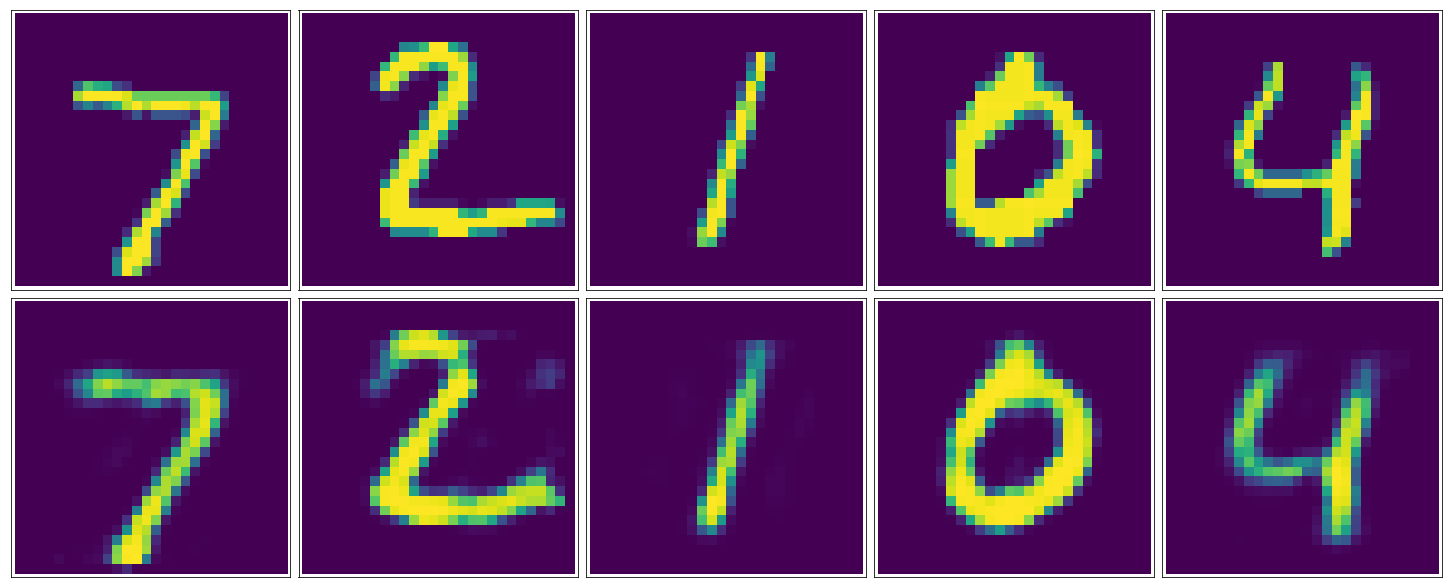

In [108]:
# 绘图
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20,8))
test_imgs = mnist.test.images[:5]
reconstructed, compressed = sess.run([outputs_, hidden_],
                                     feed_dict={inputs_: test_imgs})

for image, row in zip([test_imgs, reconstructed], axes):
    for img, ax in zip(image, row):
        ax.imshow(img.reshape((28, 28)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

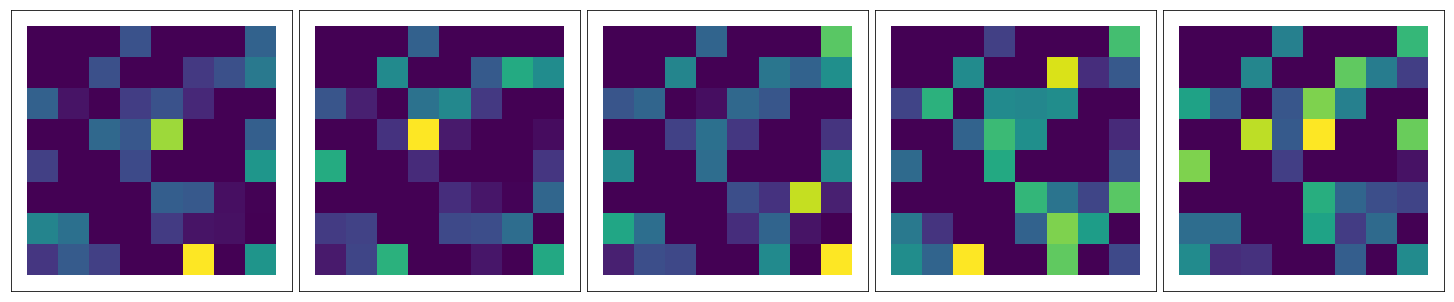

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(20,4))
for img, ax in zip(compressed, axes):
    ax.imshow(img.reshape((8,8)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
fig.tight_layout(pad=0)

In [109]:
sess.close()